In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
read_legitimate = '/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Dados coletados/leg_coleta.pkl'
read_malicious = '/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Dados coletados/test_data.pkl'

legitimate = pd.read_pickle(read_legitimate)
malicious = pd.read_pickle(read_malicious)

print(legitimate.shape)
print(malicious.shape)

(15267, 18)
(20000, 18)


In [ ]:
# balanceamento - conjunto de ataque
to_detele = []

for i in malicious.index:
  to_delete.append(i)

to_detele = to_delete[:4733]

malicious = malicious.drop(to_detele)
print(malicious.shape)

(15267, 18)


In [ ]:
data = pd.concat([legitimate, malicious], ignore_index=True)

data.shape

(30534, 18)

In [ ]:
# treino e teste
X = data.iloc[:,:-1]
y = data['target']
print("executado")

executado


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.head()

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgid,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.qos,mqtt.ver
10645,2,0.000389,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
7547,6,2.004864,24,0,0.0,0,0.0,3,0.0,6.0,143,0.0,8.0,0.0,0,0.0,0.0
4365,6,0.001486,26,0,0.0,0,0.0,3,0.0,29.0,251,0.0,8.0,0.0,0,0.0,0.0
27232,1,0.000000,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0
20189,4,0.000039,32760,0,0.0,0,0.0,3,0.0,16.0,3,0.0,3.0,0.0,0,0.0,0.0


In [ ]:
print(y_train)

10645    0
7547     0
4365     0
27232    1
20189    1
        ..
29802    1
5390     0
860      0
15795    1
23654    1
Name: target, Length: 20457, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print("executado")

executado


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

n_samples = 30534
n_features = 17

# Criação do modelo sequencial
model = Sequential([
    Dense(64, input_shape=(n_features,), activation='relu'),  # Camada densa com 64 neurônios e ReLU
    Dropout(0.3),                                            # Dropout para evitar overfitting
    Dense(32, activation='relu'),                            # Segunda camada densa
    Dropout(0.2),                                            # Dropout
    Dense(1, activation='sigmoid')                           # Camada de saída (classificação binária)
])

# Compilação do modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Exibição da arquitetura do modelo
model.summary()

# Treinamento do modelo
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,        # Número de épocas
                    batch_size=64,    # Tamanho do lote
                    verbose=1)

# Avaliação do modelo no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'\nLoss no teste: {loss:.4f}')
print(f'Acurácia no teste: {accuracy:.4f}')

# Predições no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Relatório de métricas
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8757 - loss: 0.3751 - val_accuracy: 0.9919 - val_loss: 0.0834
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0687 - val_accuracy: 0.9943 - val_loss: 0.0565
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0439 - val_accuracy: 0.9963 - val_loss: 0.0495
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9956 - loss: 0.0368 - val_accuracy: 0.9959 - val_loss: 0.0438
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9965 - loss: 0.0263 - val_accuracy: 0.9963 - val_loss: 0.0380
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9962 - loss: 0.0260 - val_accuracy: 0.9963 - val_loss: 0.0402
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0305 - val_accuracy: 0.9963 - val_loss: 0.0537
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9961 - loss: 0.0256 - val_accuracy: 0.

Accuracy train:  0.9963337732805396
Accuracy test: 0.9955343852337005

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      5047
           1       0.99      1.00      1.00      5030

    accuracy                           1.00     10077
   macro avg       1.00      1.00      1.00     10077
weighted avg       1.00      1.00      1.00     10077





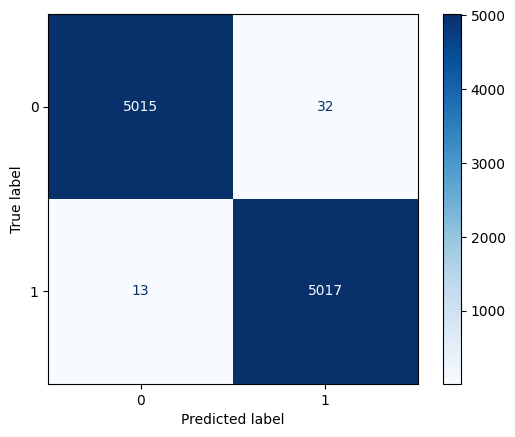

In [ ]:
# svm

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)

print("Accuracy train: ", svm_model.score(X_train, y_train))
print("Accuracy test:", svm_model.score(X_test, y_test))

# -------------------------------------------------------------------------------------------------------

print("\nClassification Report:\n", classification_report(y_test, y_pred)) # table classification report
print("\n")

# -------------------------------------------------------------------------------------------------------

ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, cmap="Blues") # confusion matrix